# Data PreProcessing Of Sonar Data (REPORT)
---
**Name:**
 Kieleh Ngong Ivoline-Clarisse 
 
**Number:**
178229001010

**Date:**
05/16/2019

---

### Import Libraries and Read Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
#df = pd.read_csv('sonar.dat', sep='\s+', header=None, skiprows=1)

df = pd.read_csv('sonar.dat',header=None, sep=',\s+',skiprows=65, engine='python')

data = df.filter([5,6,7,8,60], axis=1)

data.head()

,5,6,7,8,60
0,0.099,0.154,0.160,0.311,R
1,0.258,0.216,0.348,0.334,R
2,0.228,0.243,0.377,0.560,R
3,0.037,0.110,0.128,0.060,R
4,0.065,0.121,0.247,0.356,R


### Data Exploration and Data Quality

In [3]:
#Method For Data Exporation

def exploreData(dataframe):
    # Preview dataset
    print("Dataset Head")
    print(dataframe.head(3))
    print("--" * 50)
    
    # Features in dataset
    print("Dataset Atrributes")
    print(dataframe.columns.values)
    print("--" * 50)
    
     # view distribution of numerical features across the data set
    print("Dataset Numerical Features")
    print(dataframe.describe())
    print("--" * 50)
    
    # View How many samples and how many missing values for each feature
    print("Dataset Features Details")
    print(dataframe.info())
    print("--" * 50)
    
    # view distribution of categorical features across the data set
#     print("Dataset Categorical Features")
#     print(dataframe.describe(include=['O']))
#     print("--" * 50)
        
    #Checking for missing values
    print("Check for Missing Values")
    print(dataframe.isnull().sum())
    print("--" * 50)

     #Get number of instances and number of attributes
    print("Number of Instances and Attributes")
    print(dataframe.shape)
    print("--" * 50)
    
# exploreData(df)

In [4]:
X = df.iloc[:,5:9]
#print(X[100:110])
# Get last column which contains the outcomes(S and M)
y = df.iloc[:,60]


## Question 1


### Five Number Summary

In [5]:
X.describe().reindex(['min','25%','50%','75%','max'])

,5,6,7,8
min,0.010,0.00300,0.00600,0.00800
25%,0.067,0.08075,0.08000,0.09675
50%,0.092,0.10700,0.11200,0.15200
75%,0.134,0.15400,0.16925,0.23350
max,0.382,0.37300,0.45900,0.68300


### Mean

In [6]:
X.mean(axis=0)

5    0.104572
6    0.121755
7    0.134793
8    0.178005
dtype: float64

### Mode

In [7]:
X.mode().loc[0]

5    0.077
6    0.102
7    0.066
8    0.074
Name: 0, dtype: float64

### InterQuartile Range

In [8]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

5    0.06700
6    0.07325
7    0.08925
8    0.13675
dtype: float64


### Variance

In [9]:
X.var()

5    0.003492
6    0.003823
7    0.007244
8    0.014016
dtype: float64

### Standard  Deviation

In [10]:
X.std()

5    0.059095
6    0.061830
7    0.085111
8    0.118388
dtype: float64

### Outliers


In [11]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR (how many outliers in each column)
print("Number of Outliers In Each Column")
((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).sum()

# mask = X[5].between(X[5].quantile(0.25), X[5].quantile(0.75), inclusive=True)
# iqr = d.loc[mask, 5]

Number of Outliers In Each Column


5     8
6     5
7    11
8     8
dtype: int64

In [12]:
# Displaying the outliers
mask = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))
X_mask = X[mask]
X_mask.dropna(thresh=1)


,5,6,7,8
1,0.258,NaN,0.348,NaN
2,NaN,NaN,0.377,0.560
19,0.256,0.295,0.411,0.498
20,0.307,0.301,NaN,NaN
87,NaN,NaN,0.311,NaN
90,0.259,NaN,NaN,NaN
91,0.382,0.373,0.358,NaN
127,NaN,0.302,0.346,NaN
130,0.261,NaN,NaN,NaN
132,NaN,NaN,0.422,0.574


### Boxplots for Each Attribute

Text(0.5, 1.0, 'Band 8 BoxPlot')

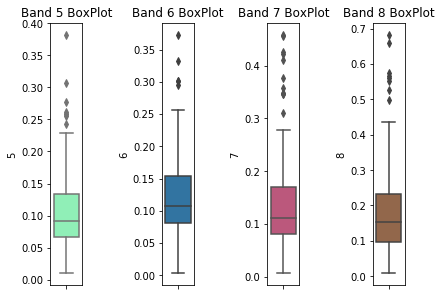

In [13]:
f, axes = plt.subplots(1, 4,constrained_layout=True)
sns.boxplot(x=5, data=X,  orient='v' , ax=axes[0],palette = "rainbow").set_title('Band 5 BoxPlot')
sns.boxplot(x=6, data=X,  orient='v' , ax=axes[1]).set_title('Band 6 BoxPlot')
sns.boxplot(x=7, data=X,  orient='v' , ax=axes[2],palette = "plasma").set_title('Band 7 BoxPlot')
sns.boxplot(x=8, data=X,  orient='v' , ax=axes[3],palette = "copper").set_title('Band 8 BoxPlot')


## Question 2

### Min-Max Normalization

In [14]:
from sklearn import preprocessing

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
X_scaled = min_max_scaler.fit_transform(X)
# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(X_scaled)
df_normalized.head()

,0,1,2,3
0,0.239247,0.408108,0.339956,0.448889
1,0.666667,0.575676,0.754967,0.482963
2,0.586022,0.648649,0.818985,0.817778
3,0.072581,0.289189,0.269316,0.077037
4,0.147849,0.318919,0.532009,0.515556


Text(0, 0.5, 'Frequency')

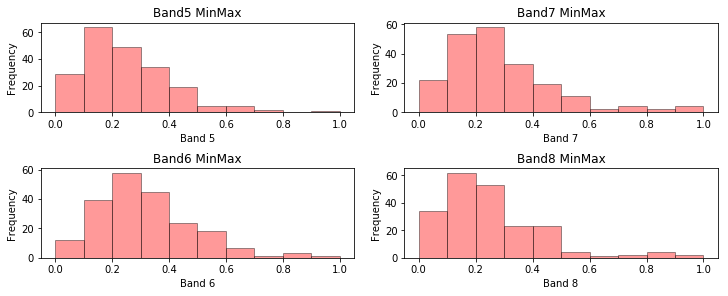

In [15]:
bin_range = np.linspace(0, 1, 11)

f, axes = plt.subplots(figsize=(10,4), ncols=2, nrows=2,constrained_layout=True)
sns.distplot(df_normalized[0], kde=False, ax=axes[0][0],color='red',hist_kws=dict(edgecolor="k", linewidth=1),bins=bin_range)
axes[0][0].set_title('Band5 MinMax')
axes[0][0].set_xlabel('Band 5')
axes[0][0].set_ylabel('Frequency')

sns.distplot(df_normalized[1], kde=False,ax=axes[1][0], color='red',hist_kws=dict(edgecolor="k", linewidth=1),bins=bin_range)
axes[1][0].set_title('Band6 MinMax')
axes[1][0].set_xlabel('Band 6')
axes[1][0].set_ylabel('Frequency')

sns.distplot(df_normalized[2], kde=False,ax=axes[0][1], color='red',hist_kws=dict(edgecolor="k", linewidth=1),bins=bin_range)
axes[0][1].set_title('Band7 MinMax')
axes[0][1].set_xlabel('Band 7')
axes[0][1].set_ylabel('Frequency')

sns.distplot(df_normalized[3], kde=False,ax=axes[1][1], color = "red",hist_kws=dict(edgecolor="k", linewidth=1),bins=bin_range)
axes[1][1].set_title('Band8 MinMax')
axes[1][1].set_xlabel('Band 8')
axes[1][1].set_ylabel('Frequency')

### Z-Score Normalization

In [16]:
from scipy import stats

X_normalized = X.apply(stats.zscore)
X_normalized.head()

,5,6,7,8
0,-0.094518,0.522771,0.296876,1.126096
1,2.602535,1.527939,2.511075,1.320842
2,2.093657,1.965673,2.852627,3.234428
3,-1.146198,-0.190573,-0.080009,-0.999170
4,-0.671246,-0.012237,1.321532,1.507120


Text(0, 0.5, 'Frequency')

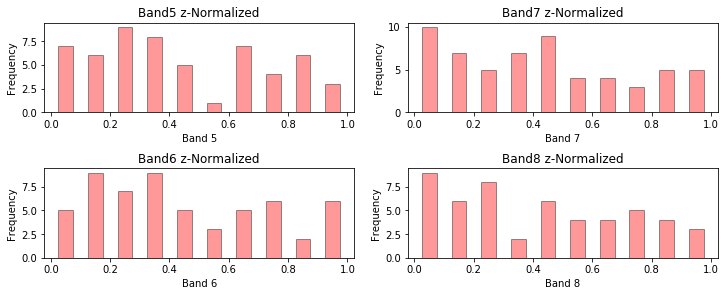

In [17]:
bin_range = np.linspace(0, 1, 11)

f, axes = plt.subplots(figsize=(10,4), ncols=2, nrows=2,constrained_layout=True)
sns.distplot(X_normalized[5], kde=False, ax=axes[0][0],color='red',hist_kws=dict(edgecolor="k", linewidth=1,rwidth=0.5),bins=bin_range)
axes[0][0].set_title('Band5 z-Normalized')
axes[0][0].set_xlabel('Band 5')
axes[0][0].set_ylabel('Frequency')

sns.distplot(X_normalized[6], kde=False,ax=axes[1][0], color='red',hist_kws=dict(edgecolor="k", linewidth=1,rwidth=0.5),bins=bin_range)
axes[1][0].set_title('Band6 z-Normalized')
axes[1][0].set_xlabel('Band 6')
axes[1][0].set_ylabel('Frequency')

sns.distplot(X_normalized[7], kde=False,ax=axes[0][1], color='red',hist_kws=dict(edgecolor="k", linewidth=1,rwidth=0.5),bins=bin_range)
axes[0][1].set_title('Band7 z-Normalized')
axes[0][1].set_xlabel('Band 7')
axes[0][1].set_ylabel('Frequency')

sns.distplot(X_normalized[8], kde=False,ax=axes[1][1], color = "red",hist_kws=dict(edgecolor="k", linewidth=1,rwidth=0.5),bins=bin_range)
axes[1][1].set_title('Band8 z-Normalized')
axes[1][1].set_xlabel('Band 8')
axes[1][1].set_ylabel('Frequency')

### N Equal-width

In [18]:
#width=(max−min)/N

# Equal interval widths
bin_range = [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.70, 0.80]

X['5_bin_custom_range'] = pd.cut(np.array(X[5]),bins=bin_range)
#X[5,'5_bin_custom_range'].iloc(10,20)
X[[5, '5_bin_custom_range']].iloc[10:20]


,5,5_bin_custom_range
10,0.028,"(0.0, 0.1]"
11,0.010,"(0.0, 0.1]"
12,0.055,"(0.0, 0.1]"
13,0.159,"(0.1, 0.2]"
14,0.036,"(0.0, 0.1]"
15,0.229,"(0.2, 0.3]"
16,0.118,"(0.1, 0.2]"
17,0.081,"(0.0, 0.1]"
18,0.076,"(0.0, 0.1]"
19,0.256,"(0.2, 0.3]"


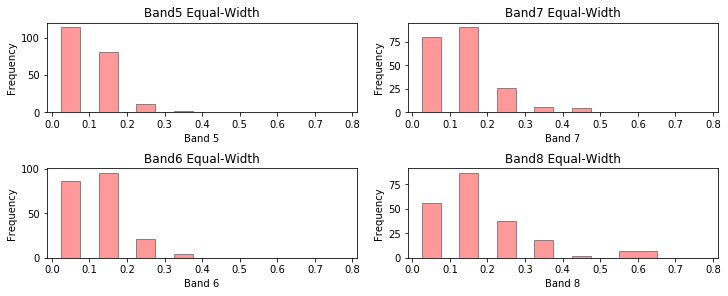

In [19]:
# Equal interval widths
bin_range = [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.70, 0.80]

#bin_range = np.linspace(0, 1, 11)

f, axes = plt.subplots(figsize=(10,4), ncols=2, nrows=2,constrained_layout=True)
sns.distplot(X[5], kde=False, ax=axes[0][0],color='red',hist_kws=dict(edgecolor="k", linewidth=1,rwidth=0.5),bins=bin_range)
axes[0][0].set_title('Band5 Equal-Width')
axes[0][0].set_xlabel('Band 5')
axes[0][0].set_ylabel('Frequency')

sns.distplot(X[6], kde=False,ax=axes[1][0], color='red',hist_kws=dict(edgecolor="k", linewidth=1,rwidth=0.5),bins=bin_range)
axes[1][0].set_title('Band6 Equal-Width')
axes[1][0].set_xlabel('Band 6')
axes[1][0].set_ylabel('Frequency')

sns.distplot(X[7], kde=False,ax=axes[0][1], color='red',hist_kws=dict(edgecolor="k", linewidth=1,rwidth=0.5),bins=bin_range)
axes[0][1].set_title('Band7 Equal-Width')
axes[0][1].set_xlabel('Band 7')
axes[0][1].set_ylabel('Frequency')

sns.distplot(X[8], kde=False,ax=axes[1][1], color = "red",hist_kws=dict(edgecolor="k", linewidth=1,rwidth=0.5),bins=bin_range)
axes[1][1].set_title('Band8 Equal-Width')
axes[1][1].set_xlabel('Band 8')
axes[1][1].set_ylabel('Frequency')

X['5_bin_custom_range'] = pd.cut(np.array(X[5]),bins=bin_range)



## Question 3

### Methods for Calculating Entropy and Information Gain for Each Attribute

In [20]:
def entropy(target_col):
    """
    Calculate the entropy of a dataset.
    The only parameter of this function is the target_col parameter which specifies the target column
    """
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

def InfoGain(data,split_attribute_name,target_name="class"):
    """
    Calculate the information gain of a dataset. This function takes three parameters:
    1. data = The dataset for whose feature the IG should be calculated
    2. split_attribute_name = the name of the feature for which the information gain should be calculated
    3. target_name = the name of the target feature. The default for this example is "class"
    """    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

### Calculating Entropy for Entire Dataset

In [21]:
#Convert categorical variable to numerical
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
#print(y[200:210])
y = labelencoder.fit_transform(y)
print(y[200:210])

# Entropy of output
print(entropy(y))

[0 0 0 0 0 0 0 0]
0.9967295890208365


### 3-Equal Width (Dividing the data into 3 intervals of equal size)

#### For Band 5 Variable

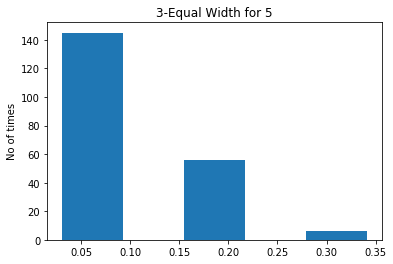

In [22]:
# 3-Equal Width
width = (X[5].max()-X[5].min())/3
#print(width)
bin_range = [0, 0.124, 0.248, 0.372]

X['5_equal_width'] = pd.cut(np.array(X[5]),bins=bin_range)
X[[5, '5_equal_width']].iloc[10:20]
plt.hist(X[5], bins=bin_range,rwidth=0.5)
plt.title('3-Equal Width for 5')
plt.ylabel('No of times')
plt.show()

#bin_range = np.linspace(0, 1, 11)


In [23]:
data['3_equal_width_5'] = pd.cut(np.array(X[5]),bins=bin_range,labels=['1', '2', '3']).astype(str)
data.head()

,5,6,7,8,60,3_equal_width_5
0,0.099,0.154,0.160,0.311,R,1
1,0.258,0.216,0.348,0.334,R,3
2,0.228,0.243,0.377,0.560,R,2
3,0.037,0.110,0.128,0.060,R,1
4,0.065,0.121,0.247,0.356,R,1


In [24]:
print("Band 5 Information Gain(3-Equal Width) = ",InfoGain(data,'3_equal_width_5',60))

Band 5 Information Gain(3-Equal Width) =  0.04934766243565114


#### For Band 6 Variable

In [25]:
# 3-Equal Width
width = (X[6].max()-X[6].min())/3
print(width)
bin_range = [0, 0.124, 0.248, 0.372]

0.12333333333333334


In [26]:
data['3_equal_width_6'] = pd.cut(np.array(X[6]),bins=bin_range,labels=['1', '2', '3']).astype(str)
print("Band 6 Information Gain(3-Equal Width) = ",InfoGain(data,'3_equal_width_6',60))

Band 6 Information Gain(3-Equal Width) =  0.030302225934551674


#### For Band 7 Variable

In [27]:
# 3-Equal Width
width = (X[7].max()-X[7].min())/3
print(width)
bin_range = [0, 0.15, 0.3, 0.45]

0.151


In [28]:
data['3_equal_width_7'] = pd.cut(np.array(X[7]),bins=bin_range,labels=['1', '2', '3']).astype(str)
print("Band 7 Information Gain(3-Equal Width) = ",InfoGain(data,'3_equal_width_7',60))

Band 7 Information Gain(3-Equal Width) =  0.042331819850458086


#### For Band 8 Variable

In [29]:
# 3-Equal Width
width = (X[8].max()-X[8].min())/3
print(width)
bin_range = [0, 0.22, 0.44, 0.66]


0.22499999999999998


In [30]:
data['3_equal_width_8'] = pd.cut(np.array(X[8]),bins=bin_range,labels=['1', '2', '3']).astype(str)
print("Band 8 Information Gain(3-Equal Width) = ",InfoGain(data,'3_equal_width_8',60))

Band 8 Information Gain(3-Equal Width) =  0.05417326364611841


### 4-Equal Width (Dividing the data into 4 intervals of equal size)

#### For Band 5 Variable

0.093


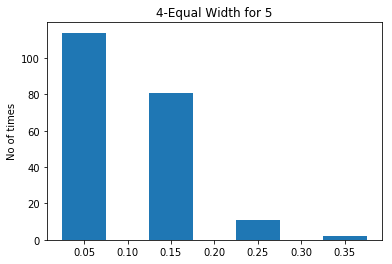

In [31]:
# 4-Equal Width
width = (X[5].max()-X[5].min())/4
print(width)

bin_range = [0, 0.1, 0.2, 0.3, 0.4]
data['4_equal_width_5'] = pd.cut(np.array(X[5]),bins=bin_range,labels=['1', '2', '3','4']).astype(str)

plt.hist(X[5], bins=bin_range,rwidth=0.5)
plt.title('4-Equal Width for 5')
plt.ylabel('No of times')
plt.show()

In [32]:
print("Band 5 Information Gain(4-Equal Width) = ",InfoGain(data,'4_equal_width_5',60))

Band 5 Information Gain(4-Equal Width) =  0.06106532996313474


#### For Band 6 Variable

In [33]:
# 4-Equal Width
width = (X[6].max()-X[6].min())/4
print(width)
bin_range = [0, 0.1, 0.2, 0.3, 0.4]
#bin_range = [0, 0.124, 0.248, 0.372]

0.0925


In [34]:
data['4_equal_width_6'] = pd.cut(np.array(X[6]),bins=bin_range,labels=['1', '2', '3','4']).astype(str)
print("Band 6 Information Gain(4-Equal Width) = ",InfoGain(data,'4_equal_width_6',60))

Band 6 Information Gain(4-Equal Width) =  0.01084032522410927


#### For Band 7 Variable

In [35]:
# 4-Equal Width
width = (X[7].max()-X[7].min())/4
print(width)
bin_range = [0, 0.1, 0.2, 0.3, 0.4]

0.11324999999999999


In [36]:
data['4_equal_width_7'] = pd.cut(np.array(X[7]),bins=bin_range,labels=['1', '2', '3','4']).astype(str)
print("Band 7 Information Gain(4-Equal Width) = ",InfoGain(data,'4_equal_width_7',60))

Band 7 Information Gain(4-Equal Width) =  0.04567023149037863


#### For Band 8 Variable

In [37]:
# 4-Equal Width
width = (X[8].max()-X[8].min())/4
print(width)
bin_range = [0, 0.17, 0.34, 0.51,0.68]

0.16874999999999998


In [38]:
data['4_equal_width_8'] = pd.cut(np.array(X[8]),bins=bin_range,labels=['1', '2', '3','4']).astype(str)
print("Band 8 Information Gain(4-Equal Width) = ",InfoGain(data,'4_equal_width_8',60))

Band 8 Information Gain(4-Equal Width) =  0.10766333547824525
